Pandas是一个强大的分析结构化数据的工具集；它的使用基础是Numpy（提供高性能的矩阵运算）；用于数据挖掘和数据分析，同时也提供数据清洗功能。本文将从以下方面对Pandas的用法进行介绍：

一、 pandas主要结构
 * series
 * dataframe
 
二、 pandas索引使用
* 索引与取数
* 重建索引

三、 pandas统计基本功能
* 描述性统计
* 函数应用
* 数据运算
* pandas分组与聚合
* pandas排序
* pandas合并/连接
* pandas迭代
* pandas字符串和文本数据

四、 pandas缺数数据处理

五、 pandas2新功能

### 1. pandas主要结构

### 1.1 Series
系列(Series)是能够保存任何类型的数据(整数，字符串，浮点数，Python对象等)的一维标记数组。轴标签统称为索引。

#### 1.1.1 创建Series

pandas.Series(data,index,dtype,copy)
- data:数据采取各种形式，如：ndarray,list,constants
- index:索引值必须是唯一的和散列的，与数据的长度相同。如果没有所有被传递，默认np.arange(n)
- dtype:用于数据类型。如果没有，将推断数据类型
- copy:复制数据，默认为false

可以使用各种输入创建一个系列，如：数组、字典、标量值或常数

In [2]:
# 创建一个空的Series
import pandas as pd
import numpy as np
s = pd.Series()
s

Series([], dtype: float64)

In [3]:
# 从ndarray创建一个Series
data = np.array(['a','b','c','d'])
s = pd.Series(data)
s  # 这里没有传递任何索引，因此默认情况下，分配了从0到len(data)-1的索引

0    a
1    b
2    c
3    d
dtype: object

In [4]:
data = np.array(['a','b','c','d'])
s = pd.Series(data,index=[100,101,102,103])
s  # 这里传递了索引值。现在可以在输出中看到自定义的索引值

100    a
101    b
102    c
103    d
dtype: object

In [5]:
# 从字典中创建一个Series
data = {'a':0.,'b':1.,'c':2.}
s = pd.Series(data)   # 注意，字典键用于构建索引
s

a    0.0
b    1.0
c    2.0
dtype: float64

In [6]:
data = {'a':0.,'b':1.,'c':2.}
s = pd.Series(data,index=['b','c','d','a'])  # 索引顺序保持不变，缺少的元素使用NaN（不是数字）填充
s

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [7]:
# 从标量创建一个Series
s = pd.Series(5,index=[0,1,2,3])
s

0    5
1    5
2    5
3    5
dtype: int64

#### 1.1.2 访问数据
系列（Series）中的数据可以使用类似于访问ndarray中的数据来访问。

In [10]:
# 从具有位置的Series中访问数据
s = pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
print(s[0])  # 检索第一个元素
print(s[:3]) # 检索Series中前三个元素
print(s[-3:]) # 检索最后三个元素

1
a    1
b    2
c    3
dtype: int64
c    3
d    4
e    5
dtype: int64


In [14]:
# 使用标签检索数据
# 一个Series就像一个固定大小的字典，可以通过索引标签获取和设置值

s = pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
print(s['a'])  # 使用索引标签值检索单个元素
print(s[['a','b','c']]) # 使用索引标签值检索多个元素

# 注意，如果索引不存在的标签，则会报错

1
a    1
b    2
c    3
dtype: int64


#### 1.1.3 Series 基本功能

基本功能如下所示：
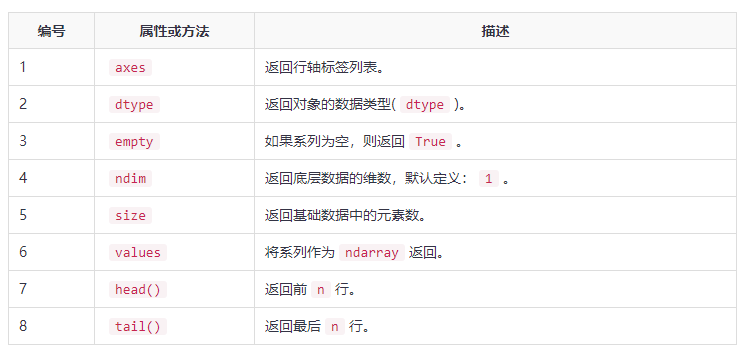

In [50]:
s = pd.Series(np.random.randn(4))
print(s.axes) # 返回Series的标签列表
print(s.empty) # 返回布尔值，表示对象是否为空
print(s.ndim) # 返回对象的维数
print(s.size) # 返回Series的大小
print(s.values) # 以数组形式返回Series中的实际数据值

[RangeIndex(start=0, stop=4, step=1)]
False
1
4
[ 0.9376181  -0.15342991 -1.85860809 -0.9484854 ]


In [51]:
s.head(2) # 显示前2行

0    0.937618
1   -0.153430
dtype: float64

In [52]:
s.tail(2) # 返回最后2行

2   -1.858608
3   -0.948485
dtype: float64

### 1.2 DataFrame
数据帧(DataFrame)是二维数据结构，即数据以行和列的表格方式排列。

数据帧(DataFrame)的功能特点:
- 潜在的列是不同的类型
- 大小可变
- 标记轴（行和列）
- 可以对行和列执行算术运算

#### 1.2.1 DataFrame创建

pandas.DataFrame(data,index,columns,dtype,copy)
- data: 数据采用各种形式，如:ndarray,series,map,lists,dict,constant和另一个DataFrame
- index:对于行标签，要用于结果帧的索引是可选缺省值,如果没有传递，默认为np.arange(n)
- columns:列标签，如果没有传入索引，则默认np.arange(n)
- dtype:每列的数据类型
- copy:默认值为False，则此命令用于复制数据

DataFrame可以使用各种输入创建，如：列表、字典、Series、ndarrays、另一个DataFrame

In [16]:
# 创建一个空的DataFrame
df = pd.DataFrame()
df

""


In [17]:
# 从列表创建DataFrame
data = [1,2,3,4,5]
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,3
3,4
4,5


In [18]:
data = [['Alex',10],['Bob',12],['Clarke',13]]   # 传入多个列表来创建DataFrame
df = pd.DataFrame(data,columns=['Name','Age'])
df

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


In [20]:
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype = float) #dtype将Age列的类型更改为浮点
df

,Name,Age
0,Alex,10.0
1,Bob,12.0
2,Clarke,13.0


In [21]:
# 从ndarrays/Lists的字典来创建DataFrame
# 所有的ndarrays必须具有相同的长度。如果传递了索引（index），则索引的长度应等于数组的长度。

data = {'Name':['Tom','Jack','Steve','Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [22]:
data = {'Name':['Tom','Jack','Steve','Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data,index=['rank1','rank2','rank3','rank4'])  # 通过index参数，设置index的名字
df

,Name,Age
rank1,Tom,28
rank2,Jack,34
rank3,Steve,29
rank4,Ricky,42


In [24]:
# 从列表创建DataFrame
data = [{'a':1,'b':2},{'a':5,'b':10,'c':20}]
df = pd.DataFrame(data) # NaN附加在缺失的区域
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [33]:
# 从Series的字典来创建DataFrame
d = {'one':pd.Series([1,2,3],index=['a','b','c']),
     'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


#### 1.2.2 列、行相关操作

##### （1）列选择
从数据帧(DataFrame)中选择一列。

In [34]:
df['one']  # 查询某一列

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [35]:
df[['one','two']]  # 查询多列

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


##### （2） 列添加
向现有数据框添加一个新列

In [36]:
# 向现有数据框添加一个新列
df['three'] = pd.Series([10,20,30],index=['a','b','c'])
df['four'] = df['one'] + df['two']  # 观测结果发现，NAN与其他常数相加的结果还是为NaN
df

,one,two,three,four
a,1.0,1,10.0,2.0
b,2.0,2,20.0,4.0
c,3.0,3,30.0,6.0
d,NaN,4,NaN,NaN


##### （3）列删除
列可以删除或弹出

In [32]:
# 删除one列
del df['one']
df

,two,three,four
a,1,10.0,2.0
b,2,20.0,4.0
c,3,30.0,6.0
d,4,NaN,NaN


In [33]:
# 弹出two列
df.pop('two')
df

,three,four
a,10.0,2.0
b,20.0,4.0
c,30.0,6.0
d,NaN,NaN


##### （4）行选择，添加和删除

In [34]:
# 标签选择loc
# 通过将行标签传递给loc()函数来选择行
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
     'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df.loc['b']  # 查询index为b的行

one    2.0
two    2.0
Name: b, dtype: float64

In [35]:
# 按整数位置选择
# 通过将整数位置传递给iloc()函数来选择行
df.iloc[2]  # 查询第3行信息

one    3.0
two    3.0
Name: c, dtype: float64

In [36]:
# 行切片
# 可以使用:运算符选择多行
df[2:4] 

,one,two
c,3.0,3
d,NaN,4


In [39]:
# 附加行
# 使用append()函数将新行添加到DataFrame
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6],[7, 8]],columns=['a','b'])
df = df.append(df2)
df

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [40]:
# 删除行
# 使用索引标签从DataFrame中删除或删除行。 如果标签重复，则会删除多行。
df = df.drop(0) # 删除标签为0的行
df

,a,b
1,3,4
1,7,8


#### 1.2.3 DataFrame基本功能

基本功能如下所示：
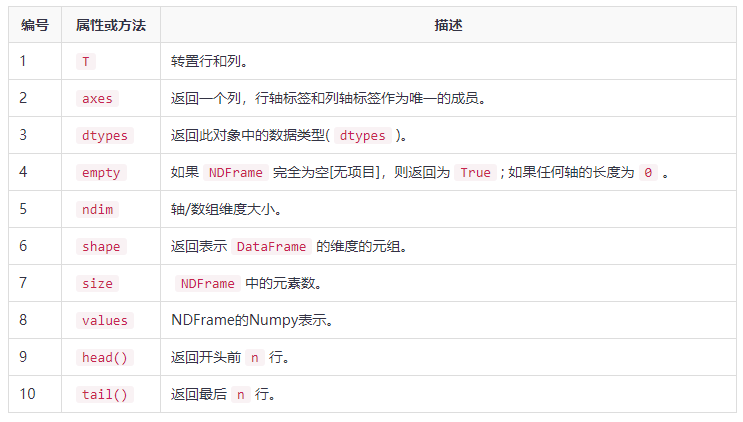

In [54]:
# 生成样例数据
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Minsu,29,4.60
6,Jack,23,3.80


In [55]:
# T 转置
df.T

,0,1,2,3,4,5,6
Name,Tom,James,Ricky,Vin,Steve,Minsu,Jack
Age,25,26,25,23,30,29,23
Rating,4.23,3.24,3.98,2.56,3.2,4.6,3.8


In [56]:
df.axes # 返回行轴标签和列轴标签列表

[RangeIndex(start=0, stop=7, step=1),
 Index(['Name', 'Age', 'Rating'], dtype='object')]

In [59]:
df.dtypes # 返回每列的数据类型

Name       object
Age         int64
Rating    float64
dtype: object

In [60]:
df.empty # 表示对象是否为空

False

In [62]:
df.ndim # 返回对象的维度

2

In [63]:
df.shape # 返回DataFrame的维度元组

(7, 3)

In [64]:
df.size # 返回DataFrame中的元素数

21

In [65]:
df.values # 将DataFrame中的实际数据作为NDarray返回

array([['Tom', 25, 4.23],
       ['James', 26, 3.24],
       ['Ricky', 25, 3.98],
       ['Vin', 23, 2.56],
       ['Steve', 30, 3.2],
       ['Minsu', 29, 4.6],
       ['Jack', 23, 3.8]], dtype=object)

In [66]:
df.head()  # 显示前5行

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20


In [67]:
df.tail() # 显示最后5行

,Name,Age,Rating
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Minsu,29,4.60
6,Jack,23,3.80


### 2. pandas索引使用

### 2.1 Pandas索引和选择数据

Pandas现在支持三种类型的多轴索引，描述如下：
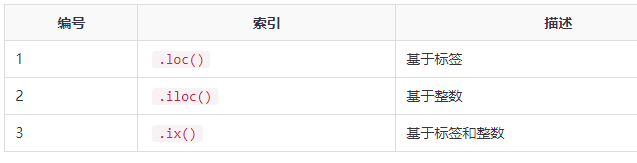

#### 2.1.1 .loc()

loc 具有多种访问方式，如：
- 单个标量标签
- 标签列表
- 切片对象
- 一个布尔数组

In [131]:
# loc需要两个单/列表/范围运算符，用","分隔。第一个表示行，第二个表示列

df = pd.DataFrame(np.random.randn(8,4),
                 index = ['a','b','c','d','e','f','g','h'],
                 columns=['A','B','C','D'])
df.loc[:,'A'] # 查询所有行的'A'列

a   -2.301160
b    0.478381
c   -0.380384
d   -0.010446
e    0.681384
f    0.434043
g   -0.086158
h   -1.385513
Name: A, dtype: float64

In [132]:
df.loc[:,['A','C']] # 查询多列

,A,C
a,-2.301160,-1.884736
b,0.478381,-1.723643
c,-0.380384,-1.811889
d,-0.010446,0.171356
e,0.681384,-0.308361
f,0.434043,-0.223542
g,-0.086158,0.307840
h,-1.385513,-0.985612


In [133]:
df.loc[['a','b','h'],['A','C']] # 根据标签查询对应的行和列

,A,C
a,-2.301160,-1.884736
b,0.478381,-1.723643
h,-1.385513,-0.985612


In [134]:
df.loc['a':'h'] # 查询a行到h列

,A,B,C,D
a,-2.301160,0.996447,-1.884736,-0.670557
b,0.478381,-1.251332,-1.723643,-0.333731
c,-0.380384,-0.454469,-1.811889,1.545611
d,-0.010446,0.763911,0.171356,-1.095339
e,0.681384,1.102832,-0.308361,1.433643
f,0.434043,0.132015,-0.223542,0.777121
g,-0.086158,0.069122,0.307840,1.260087
h,-1.385513,1.664279,-0.985612,-0.710963


In [135]:
df.loc['a']>0

A    False
B     True
C    False
D    False
Name: a, dtype: bool

#### 2.1.2 .iloc()
纯整数索引

各种访问方式如下：
-    整数
-   整数列表
-   系列值

In [138]:
df.iloc[:4]  # 查询前4行

,A,B,C,D
a,-2.301160,0.996447,-1.884736,-0.670557
b,0.478381,-1.251332,-1.723643,-0.333731
c,-0.380384,-0.454469,-1.811889,1.545611
d,-0.010446,0.763911,0.171356,-1.095339


In [139]:
df.iloc[1:5,2:4]  # 查询某些行和某些列

,C,D
b,-1.723643,-0.333731
c,-1.811889,1.545611
d,0.171356,-1.095339
e,-0.308361,1.433643


In [140]:
df.iloc[[1,3,5],[1,3]]

,B,D
b,-1.251332,-0.333731
d,0.763911,-1.095339
f,0.132015,0.777121


#### 2.1.3 .ix()
除了基于纯标签和整数之外，Pandas还提供了一种使用.ix()运算符进行选择和子集化对象的混合方法。

In [142]:
# ix()
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df.ix[:4] # 查询标签为0到4的行

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,A,B,C,D
0,-0.575100,1.853529,0.508817,-1.315724
1,-0.375026,1.440633,0.966445,0.638055
2,1.011297,1.139015,-0.215854,1.108127
3,2.515484,0.503384,-1.440738,1.577413
4,0.257918,0.088944,-0.288562,0.360140


In [143]:
df.ix[:,'A']  # 查找A列

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0   -0.575100
1   -0.375026
2    1.011297
3    2.515484
4    0.257918
5    1.090887
6   -2.466789
7    1.668839
Name: A, dtype: float64

In [144]:
# 还可以通过以下方式获取某些列的值
df['A']

0   -0.575100
1   -0.375026
2    1.011297
3    2.515484
4    0.257918
5    1.090887
6   -2.466789
7    1.668839
Name: A, dtype: float64

In [145]:
df[['A','C']] # 获取多列

,A,C
0,-0.575100,0.508817
1,-0.375026,0.966445
2,1.011297,-0.215854
3,2.515484,-1.440738
4,0.257918,-0.288562
5,1.090887,-0.575322
6,-2.466789,-0.145785
7,1.668839,-0.942069


In [146]:
# 属性访问
df.A  # 查询A列数据

0   -0.575100
1   -0.375026
2    1.011297
3    2.515484
4    0.257918
5    1.090887
6   -2.466789
7    1.668839
Name: A, dtype: float64

### 2.2 Pandas重建索引
重新索引会更改DataFrame的行标签和列标签。重新索引意味着符合数据以匹配特定轴上的一组给定的标签。

可以通过索引来实现多个操作:
- 重新排序现有数据以匹配一组新的标签
- 在没有标签数据的标签位置插入缺失值(NA)标记

In [85]:
df = pd.DataFrame({
   'A': pd.date_range(start='2019-01-01',periods=20,freq='D'),
   'x': np.linspace(0,stop=20-1,num=20),
   'y': np.random.rand(20),
   'C': np.random.choice(['Low','Medium','High'],20).tolist(),
   'D': np.random.normal(100, 10, size=(20)).tolist()
})
# 重建索引
df_reindexed = df.reindex(index=[0,2,5],columns=['A','C','B'])  # 原本没有B列，所以B列的值都为NaN
df_reindexed

,A,C,B
0,2019-01-01,High,NaN
2,2019-01-03,High,NaN
5,2019-01-06,Low,NaN


#### 2.2.1 重建索引与其他对象对齐
有时可能希望采取一个对象和重新索引，其轴被标记为与另一个对象相同。 

In [87]:
# 构建样例数据
df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])
df1

,col1,col2,col3
0,0.116654,-0.920242,-0.094980
1,0.997855,0.085608,-1.738815
2,1.443946,0.019549,0.251528
3,-1.212119,-1.210960,0.147220
4,0.788829,2.812478,-0.393173
5,1.139606,1.718862,-0.949964
6,1.123598,-1.121778,0.035585
7,-0.200309,0.043714,0.287871
8,-0.553097,-0.334700,-0.648229
9,-1.081606,-0.174223,0.057483


In [88]:
df2

,col1,col2,col3
0,1.362711,2.126439,-0.294538
1,1.062274,1.118789,-0.180609
2,-0.446018,-0.036722,-1.754342
3,0.496308,0.287495,-0.544084
4,0.394956,2.235108,-0.087951
5,1.242660,0.346076,0.685478
6,0.094422,0.742144,0.743658


In [89]:
# reindex_like()
# 让一个对象和另一个对象有相同的index 和 colums
df1 = df1.reindex_like(df2) # 将df1的index和columns都转换成跟df2的index、columns一样
df1

,col1,col2,col3
0,0.116654,-0.920242,-0.094980
1,0.997855,0.085608,-1.738815
2,1.443946,0.019549,0.251528
3,-1.212119,-1.210960,0.147220
4,0.788829,2.812478,-0.393173
5,1.139606,1.718862,-0.949964
6,1.123598,-1.121778,0.035585


#### 2.2.2 填充时重新加注

reindex_like()采用可选参数方法，它是一个填充方法，其值如下:
- pad/ffill: 向前填充值
- bfill/backfill: 向后填充值
- nearest: 从最近的索引值填充

In [92]:
# 构建样例数据
df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])
df2.reindex_like(df1)

,col1,col2,col3
0,0.176328,0.841434,-0.714321
1,-0.779040,2.391771,-1.126933
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


In [93]:
df2.reindex_like(df1,method='ffill')  # 向前填充，用前面的值来填充NaN

,col1,col2,col3
0,0.176328,0.841434,-0.714321
1,-0.779040,2.391771,-1.126933
2,-0.779040,2.391771,-1.126933
3,-0.779040,2.391771,-1.126933
4,-0.779040,2.391771,-1.126933
5,-0.779040,2.391771,-1.126933


#### 2.2.3 重新索引时的填充限制
限制参数在重建索引时提供对填充的额外控制。限制指定连续匹配的最大计数。

In [94]:
# 使用limit参数进行填充限制
df2.reindex_like(df1,method='ffill',limit=1)

,col1,col2,col3
0,0.176328,0.841434,-0.714321
1,-0.779040,2.391771,-1.126933
2,-0.779040,2.391771,-1.126933
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


#### 2.2.4 重命名
rename()允许基于一些映射（字典或者系列）或任意函数来重新标记一个轴

In [97]:
# 使用rename修改列名
df1.rename(columns={'col1':'c1','col2':'c2'},    # 将col1更改为c1,col2更改为c2
           index = {0:'apple',1:'banana',2:'durian'},
           inplace=True) # inplace默认为False
df1

,c1,c2,col3
apple,1.393154,0.510697,-1.160332
banana,-0.952572,-0.257124,2.261260
durian,-0.196542,-0.817034,1.297915
3,-0.110799,2.349779,-0.869405
4,-0.632141,-1.251734,1.320231
5,-0.576398,-1.051619,-0.053604


### 3. pandas统计基本功能

### 3.1 Pandas描述性统计

Pandas中描述性统计信息的函数如下：
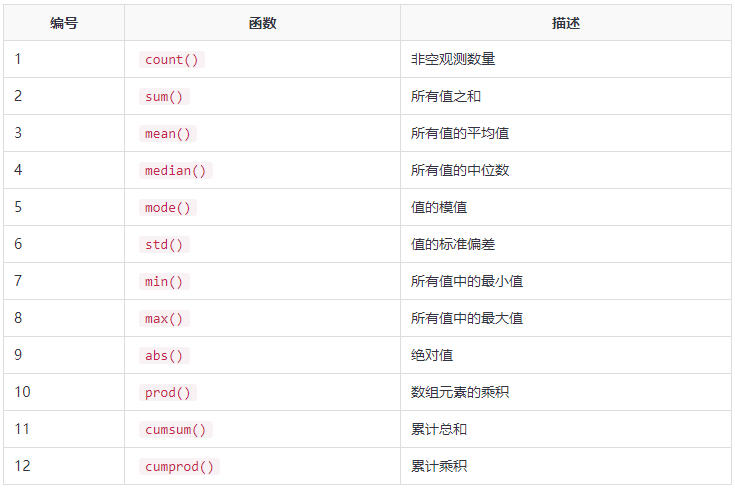

In [68]:
# 生成样例数据
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Minsu,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


In [69]:
# sum()方法
# 返回所请求轴的值得总和。默认情况下，对每一列进行求和
df.sum()

Name      TomJamesRickyVinSteveMinsuJackLeeDavidGasperBe...
Age                                                     382
Rating                                                44.92
dtype: object

In [70]:
df.sum(axis=1) # 对每一行进行求和

0     29.23
1     29.24
2     28.98
3     25.56
4     33.20
5     33.60
6     26.80
7     37.78
8     42.98
9     34.80
10    55.10
11    49.65
dtype: float64

In [71]:
# mean()
# 返回平均值
df.mean()

Age       31.833333
Rating     3.743333
dtype: float64

In [73]:
# std()
# 返回数字列的标准偏差
df.std()

Age       9.232682
Rating    0.661628
dtype: float64

In [75]:
# 汇总数据
# describe()函数是用来计算有关DataFrame列的统计信息的摘要。
df.describe() # 默认情况下只统计“数字值”

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


In [76]:
df.describe(include='all') # 将所有列汇总在一起

,Name,Age,Rating
count,12,12.000000,12.000000
unique,12,NaN,NaN
top,Gasper,NaN,NaN
freq,1,NaN,NaN
mean,NaN,31.833333,3.743333
std,NaN,9.232682,0.661628
min,NaN,23.000000,2.560000
25%,NaN,25.000000,3.230000
50%,NaN,29.500000,3.790000
75%,NaN,35.500000,4.132500


### 3.2 Pandas函数应用

#### 3.2.1 Pandas统计函数

#### 3.2.1.1 pct_change()函数
系列，DatFrames和Panel都有pct_change()函数。此函数将每个元素与其前一个元素进行比较，并计算变化百分比。

In [147]:
s = pd.Series([1,2,3,4,5,4])
s.pct_change() 

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64

#### 3.2.1.2 协方差
协方差适用于系列数据。Series对象有一个方法cov用来计算序列对象之间的协方差。

In [148]:
# 计算过程中NA将被自动排除
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
s1.cov(s2)

-0.36071798212082085

In [149]:
# 当应用于DataFrame时，协方差方法计算所有列之间的协方差值
frame = pd.DataFrame(np.random.randn(10,5),columns=['a','b','c','d','e'])
frame.cov()

,a,b,c,d,e
a,1.252565,0.035958,-0.158454,-0.220398,0.054208
b,0.035958,0.215841,-0.197608,-0.153136,-0.055824
c,-0.158454,-0.197608,1.023348,-0.152120,0.151749
d,-0.220398,-0.153136,-0.152120,0.899057,-0.284535
e,0.054208,-0.055824,0.151749,-0.284535,0.748557


#### 3.2.1.3 相关性
相关性显示了任何两个数值(Series)之间的线性关系。

In [150]:
# 有多种方法来计算 pearson(默认),spearman 和 kendall之间的相关性。

frame.corr() # 如果DataFrame中存在任何非数字列，则会自动排除

,a,b,c,d,e
a,1.000000,0.069156,-0.139956,-0.207689,0.055982
b,0.069156,1.000000,-0.420461,-0.347630,-0.138880
c,-0.139956,-0.420461,1.000000,-0.158591,0.173381
d,-0.207689,-0.347630,-0.158591,1.000000,-0.346841
e,0.055982,-0.138880,0.173381,-0.346841,1.000000


#### 3.2.1.4 数据排名
数据排名为元素数组中的每个元素生成排名。在关系的情况下，分配平均等级。

Rank可选地使用一个默认为true的升序参数; 当错误时，数据被反向排序，也就是较大的值被分配较小的排序。Rank支持不同的方法：
- average: 并列组平均排序等级
- min: 组中最低的排序等级
- max: 组中最高的排序等级
- first: 按照它们出现在数组中的顺序分配队列

In [153]:
s = pd.Series(np.random.np.random.randn(5),index=list('abcde'))
s['d'] = s['b'] # 构造一个相同的情况
s.rank()

a    5.0
b    3.5
c    2.0
d    3.5
e    1.0
dtype: float64

In [154]:
s.rank(method='min') # 使用min方法后，比如有两个排名并列第三，则两个的排名都为3

a    5.0
b    3.0
c    2.0
d    3.0
e    1.0
dtype: float64

In [155]:
s.rank(method='max') # 使用max方法后，比如有两个排名并列第三，则两个数的排名都为4

a    5.0
b    4.0
c    2.0
d    4.0
e    1.0
dtype: float64

In [156]:
s.rank(method='first') # 数值大小相同情况下，根据在数组中的位置来定排名前后

a    5.0
b    3.0
c    2.0
d    4.0
e    1.0
dtype: float64

#### 3.2.2 Pandas窗口函数

为了处理数字数据，Pandas提供了几个变体，如滚动，展开和指数移动窗口统计的权重。其中包括总和，均值，中位数，方差，协方差，相关性等。

#### 3.2.2.1 .rolling()函数
这个函数可以应用于一系列数据。指定window=n参数并在其上应用适当的统计函数。

DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)
- window：表示时间窗的大小，注意有两种形式（int or offset）。如果使用int，则数值表示计算统计量的观测值的数量即向前几个数据。如果是offset类型，表示时间窗的大小。
- min_periods：最少需要有值的观测点的数量，对于int类型，默认与window相等。对于offset类型，默认为1。
- center：是否使用window的中间值作为label，默认为false。只能在window是int时使用。

In [159]:
# 构建样例数据
df = pd.DataFrame(np.random.randn(10,4),
                 index = pd.date_range('1/1/2019',periods=10),
                 columns = ['A','B','C','D'])
df

,A,B,C,D
2019-01-01,-1.327987,0.663651,1.631045,-0.042281
2019-01-02,-0.005253,0.420348,0.442055,-0.218387
2019-01-03,0.356261,0.755611,-0.105040,-1.126363
2019-01-04,0.853231,-0.272414,1.696901,-0.336484
2019-01-05,-0.432228,-2.321604,-0.300705,0.965461
2019-01-06,0.032065,0.464344,1.346653,-0.127116
2019-01-07,-0.988206,-1.518681,0.443509,1.601487
2019-01-08,-0.396659,2.169251,-0.342024,-1.092281
2019-01-09,0.380469,-1.009371,0.117781,-0.157493
2019-01-10,-1.792407,-1.456297,-1.377632,1.093072


In [160]:
# 用途：滚动窗口计算 按指定周期计算
df.rolling(window=3).mean()
# 由于窗口大小为3，前两个元素为空值，第三个元素的值为n，n-1,n-2元素的平均值

,A,B,C,D
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.325660,0.613203,0.656020,-0.462344
2019-01-04,0.401413,0.301181,0.677972,-0.560411
2019-01-05,0.259088,-0.612802,0.430385,-0.165796
2019-01-06,0.151023,-0.709891,0.914283,0.167287
2019-01-07,-0.462790,-1.125313,0.496486,0.813277
2019-01-08,-0.450933,0.371638,0.482713,0.127363
2019-01-09,-0.334799,-0.119600,0.073089,0.117237
2019-01-10,-0.602865,-0.098806,-0.533958,-0.052234


#### 3.2.2.2 .expanding()函数
提供扩展转换

DataFrame.expanding(min_periods=1, center=False, axis=0)，其中参数的意义和rolling一样，只是其不是固定窗口长度，其长度是不断的扩大的。

In [163]:
# 用途：提供扩展转换。累计计算，如累加求和
df.expanding(min_periods=3).mean()
# 第n个结果值为 第1,2，..，n-1的值求和再求平均

,A,B,C,D
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.325660,0.613203,0.656020,-0.462344
2019-01-04,-0.030937,0.391799,0.916240,-0.430879
2019-01-05,-0.111195,-0.150882,0.672851,-0.151611
2019-01-06,-0.087319,-0.048344,0.785151,-0.147529
2019-01-07,-0.216017,-0.258392,0.736345,0.102331
2019-01-08,-0.238597,0.045063,0.601549,-0.046996
2019-01-09,-0.169812,-0.072096,0.547797,-0.059273
2019-01-10,-0.332071,-0.210516,0.355254,0.055961


#### 3.2.3 Pandas其他函数应用

Pandas函数应用主要有以下几方面的运用：
- 表合理函数应用：pipe()
- 行或列函数应用：apply()
- 元素函数应用：applymap()

#### 3.2.3.1 表格函数应用
可以通过将函数和适当数量的参数作为管道参数来执行自定义操作。

In [77]:
# adder函数
# adder函数将两个数值作为参数相加并返回总和
def adder(ele1,ele2): 
    return ele1+ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df.pipe(adder,2)  # 为所有元素相加一个值2

,col1,col2,col3
0,2.134922,1.742178,2.275130
1,2.076044,1.235144,0.440649
2,1.825690,1.395828,0.175502
3,1.272963,0.227594,0.623802
4,2.309135,0.535770,2.385485


#### 3.2.3.2 行或列合理函数应用
可以使用apply()方法沿DataFrame或Panel的轴应用任意函数，它与描述性统计方法一样，采用可选的axis参数。 默认情况下，操作按列执行，将每列列为数组。

In [37]:
# apply()
# 可以使用apply()方法沿DataFrame或Panel的轴应用任意函数

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df.apply(np.mean)

col1    0.324740
col2    1.023603
col3   -0.097148
dtype: float64

In [38]:
df.apply(np.mean,axis=1)

0    0.883146
1    0.500423
2   -0.016306
3   -0.588286
4    1.306348
dtype: float64

In [39]:
df.apply(lambda x:x.max() - x.min())

col1    1.750537
col2    4.022997
col3    2.924760
dtype: float64

#### 3.2.3.3 元素合理函数应用
并不是所有的函数都可以向量化(也不是返回另一个数组的NumPy数组，也不是任何值)，在DataFrame上的方法applymap()和类似于在Series上的map()接受任何Python函数，并且返回单个值。

In [41]:
# map针对于Series
df['col1'].map(lambda x:x*100)

0    -32.095232
1    136.731397
2     48.233763
3    -38.322272
4     47.822448
Name: col1, dtype: float64

In [42]:
# applymap针对DataFrame
df.applymap(lambda x:x*100)

,col1,col2,col3
0,-32.095232,340.825931,-43.786954
1,136.731397,-3.286422,16.681865
2,48.233763,65.502181,-118.627596
3,-38.322272,-61.473778,-76.689607
4,47.822448,170.233595,173.848357


In [43]:
# 可以利用applymap对DataFrame中的每个值进行操作
# 比如：将DataFrame中的各个浮点值保留两位小数
f=lambda x: '%.2f'%x
df.applymap(f)

,col1,col2,col3
0,-0.32,3.41,-0.44
1,1.37,-0.03,0.17
2,0.48,0.66,-1.19
3,-0.38,-0.61,-0.77
4,0.48,1.70,1.74


### 3.3 数据运算

#### 3.3.1 Series之间的运算

In [1]:
import pandas as pd
m = pd.Series([1,2,3,4],index=['a','b','c','d'])
n = pd.Series([1,-1,3,-7,-2],index=['a','e','c','f','g'])
m

a    1
b    2
c    3
d    4
dtype: int64

In [2]:
n

a    1
e   -1
c    3
f   -7
g   -2
dtype: int64

In [3]:
m+n

a    2.0
b    NaN
c    6.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

sereis相加会自动进行数据对齐操作，在不重叠的索引处会使用NA(NaN)值进行填充，series进行算术运算的时候，不需要保证series的大小一致。其余操作类似。

In [6]:
m-n

a    0.0
b    NaN
c    0.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

In [7]:
m*n

a    1.0
b    NaN
c    9.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

In [8]:
m/n

a    1.0
b    NaN
c    1.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

#### 3.3.2 DataFrame之间的运算

In [7]:
d1 = np.arange(1,10).reshape(3,3)
data1 = pd.DataFrame(d1,index=["a","b","c"],columns=["one","two","three"])
d2 = np.arange(1,10).reshape(3,3)
data2 = pd.DataFrame(d2,index=["a","b","e"],columns=["one","two","four"])
data1 + data2

,four,one,three,two
a,NaN,2.0,NaN,4.0
b,NaN,8.0,NaN,10.0
c,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN


dataFrame相加时，对齐操作需要行和列的索引都重叠的时候才会相加，否则会使用NA值进行填充。其他操作类似

In [8]:
data1 - data2

,four,one,three,two
a,NaN,0.0,NaN,0.0
b,NaN,0.0,NaN,0.0
c,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN


In [11]:
data1 * data2

,four,one,three,two
a,NaN,1.0,NaN,4.0
b,NaN,16.0,NaN,25.0
c,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN


In [12]:
data1 / data2

,four,one,three,two
a,NaN,1.0,NaN,1.0
b,NaN,1.0,NaN,1.0
c,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN


#### 3.3.3 DataFrame与Series的混合运算

In [14]:
# DataFrame的行进行广播
a = np.arange(9).reshape(3,3)
d = pd.DataFrame(a,index=['a','b','c'],columns=['one','two','three'])
# 取d的第一行为Series
s = d.ix[0]

d + s  # dataframe每一行都与第一行的数值相加

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


,one,two,three
a,0,2,4
b,3,5,7
c,6,8,10


In [17]:
# DataFrame的列进行广播
s = d['one']
d.add(s,axis=0) # dataframe每一列都与第一列的数值相加

,one,two,three
a,0,1,2
b,6,7,8
c,12,13,14


### 3.4 pandas分组与聚合

#### 3.4.1 分组

任何分组(groupby)操作都涉及原始对象的以下操作之一：
- 分割对象
- 应用一个函数
- 结合的结果

In [1]:
# 构建样例数据
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [197]:
# groupby 将数据拆分为组
df.groupby('Team') # 按Team来分组

#### 3.4.1.1 查看分组

In [198]:
df.groupby('Team').groups

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}

In [199]:
# 按多列分组
df.groupby(['Team','Year']).groups

{('Devils', 2014): Int64Index([2], dtype='int64'),
 ('Devils', 2015): Int64Index([3], dtype='int64'),
 ('Kings', 2014): Int64Index([4], dtype='int64'),
 ('Kings', 2016): Int64Index([6], dtype='int64'),
 ('Kings', 2017): Int64Index([7], dtype='int64'),
 ('Riders', 2014): Int64Index([0], dtype='int64'),
 ('Riders', 2015): Int64Index([1], dtype='int64'),
 ('Riders', 2016): Int64Index([8], dtype='int64'),
 ('Riders', 2017): Int64Index([11], dtype='int64'),
 ('Royals', 2014): Int64Index([9], dtype='int64'),
 ('Royals', 2015): Int64Index([10], dtype='int64'),
 ('kings', 2015): Int64Index([5], dtype='int64')}

#### 3.4.1.2 迭代遍历分组

In [200]:
# 对于groupby对象，可以遍历类似itertools.obj的对象
grouped = df.groupby('Year')
for name,group in grouped:
    print(name)
    print(group)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


In [201]:
# 选择一个分组
# 使用get_group()方法，可以选择一个组。
grouped = df.groupby('Year')
grouped.get_group(2014)

,Team,Rank,Year,Points
0,Riders,1,2014,876
2,Devils,2,2014,863
4,Kings,3,2014,741
9,Royals,4,2014,701


In [202]:
# 对分组后的数据进行统计操作
df.groupby('Year').mean() # 按Year列分组，获取其他列均值

,Rank,Points
Year,,
2014,2.5,795.25
2015,2.5,769.50
2016,1.5,725.00
2017,1.5,739.00


In [203]:
# 按多列分组，并获取其他列的均值
df.groupby(['Year','Team']).mean()

Rank  Points
Year Team                
2014 Devils     2     863
     Kings      3     741
     Riders     1     876
     Royals     4     701
2015 Devils     3     673
     Riders     2     789
     Royals     1     804
     kings      4     812
2016 Kings      1     756
     Riders     2     694
2017 Kings      1     788
     Riders     2     690

In [206]:
# 也可以分组后，选择列进行运算
g = df.groupby('Year') # 先按Year列分组
g['Points'].mean() # 再对分组总的Points列进行求均值

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64

#### 3.4.2 聚合

In [3]:
# 聚合函数为每个组返回单个聚合值。当创建了分组(group by)对象，就可以对分组数据执行多个聚合操作。
# 比较常用的是使用agg
grouped = df.groupby('Year')
grouped['Points'].agg(np.mean)

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64

In [4]:
# 一次应用多个聚合函数
grouped = df.groupby('Year')
grouped['Points'].agg([np.sum,np.mean,np.std])

,sum,mean,std
Year,,,
2014,3181,795.25,87.439026
2015,3078,769.50,65.035888
2016,1450,725.00,43.840620
2017,1478,739.00,69.296465


#### 3.4.2.1 转换

In [14]:
# transform能返回完整数据的某一变换。输出的形状和输入一致。
g = df.groupby('Team')
score = lambda x: (x - x.mean()) / x.std()*10
g.transform(score)

,Rank,Year,Points
0,-15.000000,-11.618950,12.843272
1,5.000000,-3.872983,3.020286
2,-7.071068,-7.071068,7.071068
3,7.071068,7.071068,-7.071068
4,11.547005,-10.910895,-8.608621
5,NaN,NaN,NaN
6,-5.773503,2.182179,-2.360428
7,-5.773503,8.728716,10.969049
8,5.000000,3.872983,-7.705963
9,7.071068,-7.071068,-7.071068


#### 3.4.2.2 agg 与 transform 比较

In [15]:
# agg会返回数据的缩减版本，而transform能返回完整数据
# 下面以举例的形式说明
g.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [17]:
# 查看一下分组的结果
for k,v in g:
    print(k,v)

Devils      Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings     Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders       Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals       Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings     Team  Rank  Year  Points
5  kings     4  2015     812


In [19]:
g.transform(np.mean)
# 结果解释，第0、1、8、11行的数据是一样的，这是因为在Riders这个Team中，总共有四行数据，且每一行都用该组的均值表示

,Rank,Year,Points
0,1.750000,2015.500000,762.250000
1,1.750000,2015.500000,762.250000
2,2.500000,2014.500000,768.000000
3,2.500000,2014.500000,768.000000
4,1.666667,2015.666667,761.666667
5,4.000000,2015.000000,812.000000
6,1.666667,2015.666667,761.666667
7,1.666667,2015.666667,761.666667
8,1.750000,2015.500000,762.250000
9,2.500000,2014.500000,752.500000


#### 3.4.2.3 过滤

In [10]:
# filter()函数用于过滤数据
# 根据定义的标准过滤数据,并返回数据的子集

f = df.groupby('Team').filter(lambda x: len(x)>3) #筛选出记录数大于3的组
f

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [21]:
df.groupby('Team').filter(lambda x: np.max(x['Rank'])<=3)  # 筛选出组中最大排名不超过3的组

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


### 3.5 pandas排序

Pandas有两种排序方式，分别是：
- 按标签
- 按实际值

In [107]:
# 生成样例数据
unsorted_df=pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns=['col2','col1'])
unsorted_df  # 该df中，标签和值未排序

,col2,col1
1,0.679809,-0.327875
4,1.580933,-0.024787
6,0.600616,-0.057837
2,-0.047888,-0.268427
3,-0.137648,-0.615558
5,-0.742281,0.966626
9,-0.696446,0.869444
8,0.285668,0.652800
0,-0.460373,1.873532
7,0.177655,1.459921


#### 3.5.1 按标签排序
使用sort_index()方法，通过传递axis参数和排序顺序，可以对DataFrame进行排序。 

In [108]:
# 默认情况下，按照升序对行标签进行排序

sorted_df = unsorted_df.sort_index()
sorted_df

,col2,col1
0,-0.460373,1.873532
1,0.679809,-0.327875
2,-0.047888,-0.268427
3,-0.137648,-0.615558
4,1.580933,-0.024787
5,-0.742281,0.966626
6,0.600616,-0.057837
7,0.177655,1.459921
8,0.285668,0.652800
9,-0.696446,0.869444


In [109]:
# 通过将布尔值传递给升序参数，可以控制排序顺序（ascending参数）
sorted_df = unsorted_df.sort_index(ascending=False) #降序
sorted_df

,col2,col1
9,-0.696446,0.869444
8,0.285668,0.652800
7,0.177655,1.459921
6,0.600616,-0.057837
5,-0.742281,0.966626
4,1.580933,-0.024787
3,-0.137648,-0.615558
2,-0.047888,-0.268427
1,0.679809,-0.327875
0,-0.460373,1.873532


#### 3.5.2 按列排序
通过传递axis参数值为0或1，可以对列标签进行排序。默认情况下，axis = 0，逐行排列。

In [112]:
sorted_df = unsorted_df.sort_index(axis = 1)
sorted_df

,col1,col2
1,-0.327875,0.679809
4,-0.024787,1.580933
6,-0.057837,0.600616
2,-0.268427,-0.047888
3,-0.615558,-0.137648
5,0.966626,-0.742281
9,0.869444,-0.696446
8,0.652800,0.285668
0,1.873532,-0.460373
7,1.459921,0.177655


#### 3.5.3 按值排序
像索引排序一样，sort_values()是按值排序的方法。它接受一个by参数，它将使用要与其排序值的DataFrame的列名称。

In [114]:
# sort_values()
unsorted_df = pd.DataFrame({'col1':[2,1,1,1],'col2':[1,3,2,4]})
sorted_df = unsorted_df.sort_values(by='col1') # 根据列col1的值来排序
sorted_df

,col1,col2
1,1,3
2,1,2
3,1,4
0,2,1


In [115]:
# 可以根据多列的值大小来排序
# 比如下列，先按col1列的值排序，当col1列的值相同时，再考虑col2列的值大小
sorted_df = unsorted_df.sort_values(by=['col1','col2'])
sorted_df

,col1,col2
2,1,2
1,1,3
3,1,4
0,2,1


#### 3.5.4 排序算法
sort_values()提供了从mergeesort，heapsort和quicksort中选择算法的一个配置。

In [117]:
# Mergesort是唯一稳定的算法

sorted_df = unsorted_df.sort_values(by='col1',kind='mergesort')
sorted_df

,col1,col2
1,1,3
2,1,2
3,1,4
0,2,1


### 3.6 Pandas合并/连接
Pandas具有功能全面的高性能内存中连接操作，与SQL等关系数据库非常相似。

#### 3.6.1 merge函数

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True)
- left: 一个DataFrame对象
- right: 另一个DataFrame对象
- on: 用于连接的列名，必须在左和右DataFrame对象中存在的列
- left_on: 左侧DataFrame用作连接的键，可以是列名或长度等于DataFrame长度的数组
- right_on: 右边的DataFrame用作连接的键
- left_index: 如果为True，则使用左侧DataFrame中的索引(行标签)作为其连接键。 在具有MultiIndex(分层)的DataFrame的情况下，级别的数量必须与来自右DataFrame的连接键的数量相匹配。
- right_index: 与left_index用法相同
- how: 它是left, right, outer以及inner之中的一个，默认为内inner。
- sort: 按照字典顺序通过连接键对结果DataFrame进行排序。默认为True，设置为False时，在很多情况下大大提高性能。

In [40]:
# 构建样例数据
left = pd.DataFrame({'id':[1,2,3,4,5],
                     'Name':['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
                     'subject':['sub1','sub2','sub3','sub4','sub5']})

right = pd.DataFrame({'id':[1,2,3,4,5],
                     'Name':['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
                     'subject':['sub2','sub4','sub3','sub6','sub5']})

print(left)
print('-----------------------')
print(right)

   id    Name subject
0   1    Alex    sub1
1   2     Amy    sub2
2   3   Allen    sub3
3   4   Alice    sub4
4   5  Ayoung    sub5
-----------------------
   id   Name subject
0   1  Billy    sub2
1   2  Brian    sub4
2   3   Bran    sub3
3   4  Bryce    sub6
4   5  Betty    sub5


In [2]:
import pandas as pd
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.4.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: AMD64 Family 22 Model 48 Stepping 1, AuthenticAMD
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 3.3.2
pip: 19.0.3
setuptools: 38.4.0
Cython: 0.27.3
numpy: 1.16.2
scipy: 1.3.1
pyarrow: None
xarray: None
IPython: 6.2.1
sphinx: 1.6.6
patsy: 0.5.0
dateutil: 2.6.1
pytz: 2017.3
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.4
feather: None
matplotlib: 3.1.1
openpyxl: 2.4.10
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.1
bs4: 4.6.0
html5lib: 1.0.1
sqlalchemy: 1.2.1
pymysql: None
psycopg2: 2.8.3 (dt dec pq3 ext lo64)
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [41]:
# 在一个键上合并两个DataFrame
pd.merge(left,right,on='id') # 默认参数how是inner内连接

,id,Name_x,subject_x,Name_y,subject_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub3,Bran,sub3
3,4,Alice,sub4,Bryce,sub6
4,5,Ayoung,sub5,Betty,sub5


In [42]:
# 合并多个键上的两个DataFrame
pd.merge(left,right,on=['id','subject'])

,id,Name_x,subject,Name_y
0,3,Allen,sub3,Bran
1,5,Ayoung,sub5,Betty


In [43]:
# left join
# 左连接，左侧DataFrame取全部值，右侧DataFrame匹配左侧DataFrame
pd.merge(left,right,on='subject',how='left')

,id_x,Name_x,subject,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub3,3.0,Bran
3,4,Alice,sub4,2.0,Brian
4,5,Ayoung,sub5,5.0,Betty


In [44]:
# right join
# 右连接，右侧DataFrame取全部值，左侧DataFrame匹配右侧DataFrame
pd.merge(left,right,on='subject',how='right')

,id_x,Name_x,subject,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub3,3,Bran
2,4.0,Alice,sub4,2,Brian
3,5.0,Ayoung,sub5,5,Betty
4,NaN,NaN,sub6,4,Bryce


In [45]:
# outer join
# 外连接，就是左连接和右连接的并集
pd.merge(left,right,how='outer',on='subject')

,id_x,Name_x,subject,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub3,3.0,Bran
3,4.0,Alice,sub4,2.0,Brian
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub6,4.0,Bryce


In [46]:
# inner join
# 内连接，就是左连接和右连接的交集
pd.merge(left,right,on='subject',how='inner')

,id_x,Name_x,subject,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub3,3,Bran
2,4,Alice,sub4,2,Brian
3,5,Ayoung,sub5,5,Betty


In [49]:
# 当两边合并字段不同时，可以使用left_on和right_on参数设置合并字段。
pd.merge(left,right,left_on='subject',right_on='subject')

,id_x,Name_x,subject,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub3,3,Bran
2,4,Alice,sub4,2,Brian
3,5,Ayoung,sub5,5,Betty


In [37]:
# 可以通过设置left_index或者right_index的值为True来使用索引连接
df1 = pd.DataFrame({'key':list('bbaca'),'data1':range(5)})
df2 = pd.DataFrame({'key':['a','b','d'],'data2':range(3)})
# df1使用data1作为连接关键字，而df2使用索引当连接关键字
pd.merge(df1,df2,left_on='data1',right_index=True)

,key_x,data1,key_y,data2
0,b,0,a,0
1,b,1,b,1
2,a,2,d,2


In [38]:
# 当merge合并后，pandas会自动在后面加上(_x,_y)来区分重复列，我们也可以使用suffixes来设置名字
pd.merge(df1,df2,left_on='data1',right_index=True,suffixes=('_df1','_df2'))

,key_df1,data1,key_df2,data2
0,b,0,a,0
1,b,1,b,1
2,a,2,d,2


#### 3.6.2 concat函数
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
       keys=None, levels=None, names=None, verify_integrity=False)

- objs: series,dataframe或者是panel构成的Series或映射
- axis: 需要合并连接的轴，0是行，1是列
- join: 连接方式inner,或者outer

In [60]:
df1 = pd.DataFrame({'A':[1,2,3,4],'B':[5,6,7,8],'C':[9,10,11,12]})
df2 = pd.DataFrame({'A':[100,2,300,4,6],'B':[500,6,700,8,100],'D':[900,10,1100,12,20]})

In [61]:
# 相同字段的表首尾相接
pd.concat([df1,df2]) # 默认axis=0

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D
0,1,5,9.0,NaN
1,2,6,10.0,NaN
2,3,7,11.0,NaN
3,4,8,12.0,NaN
0,100,500,NaN,900.0
1,2,6,NaN,10.0
2,300,700,NaN,1100.0
3,4,8,NaN,12.0
4,6,100,NaN,20.0


In [62]:
# 使用key来标识数据来源于哪张表
pd.concat([df1,df2],keys=['df1','df2'])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


A    B     C       D
df1 0    1    5   9.0     NaN
    1    2    6  10.0     NaN
    2    3    7  11.0     NaN
    3    4    8  12.0     NaN
df2 0  100  500   NaN   900.0
    1    2    6   NaN    10.0
    2  300  700   NaN  1100.0
    3    4    8   NaN    12.0
    4    6  100   NaN    20.0

In [63]:
# 当axis=1的时候，就是行对齐，然后将两张表的列合并
pd.concat([df1,df2],axis=1)

,A,B,C,A,B,D
0,1.0,5.0,9.0,100,500,900
1,2.0,6.0,10.0,2,6,10
2,3.0,7.0,11.0,300,700,1100
3,4.0,8.0,12.0,4,8,12
4,NaN,NaN,NaN,6,100,20


In [64]:
# join
# inner 得到的是两表的交集
pd.concat([df1,df2],axis=1,join='inner')

,A,B,C,A,B,D
0,1,5,9,100,500,900
1,2,6,10,2,6,10
2,3,7,11,300,700,1100
3,4,8,12,4,8,12


In [65]:
# outer 得到的是两表的并集
pd.concat([df1,df2],axis=1,join='outer')

,A,B,C,A,B,D
0,1.0,5.0,9.0,100,500,900
1,2.0,6.0,10.0,2,6,10
2,3.0,7.0,11.0,300,700,1100
3,4.0,8.0,12.0,4,8,12
4,NaN,NaN,NaN,6,100,20


In [68]:
# 如果有join_axes的参数传入，可以指定根据哪个轴来对齐数据
pd.concat([df1,df2],axis=1,join_axes=[df1.index])

,A,B,C,A,B,D
0,1,5,9,100,500,900
1,2,6,10,2,6,10
2,3,7,11,300,700,1100
3,4,8,12,4,8,12


In [69]:
# append是series和dataframe的方法，使用它就是默认沿着列进行拼接（axis = 0，列对齐）
df1.append(df2)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C,D
0,1,5,9.0,NaN
1,2,6,10.0,NaN
2,3,7,11.0,NaN
3,4,8,12.0,NaN
0,100,500,NaN,900.0
1,2,6,NaN,10.0
2,300,700,NaN,1100.0
3,4,8,NaN,12.0
4,6,100,NaN,20.0


In [70]:
# ignore_index参数为True，合并完后的表，再重新整理一个新的index
pd.concat([df1,df2],ignore_index=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D
0,1,5,9.0,NaN
1,2,6,10.0,NaN
2,3,7,11.0,NaN
3,4,8,12.0,NaN
4,100,500,NaN,900.0
5,2,6,NaN,10.0
6,300,700,NaN,1100.0
7,4,8,NaN,12.0
8,6,100,NaN,20.0


### 3.7 Pandas迭代

Pandas对象之间的基本迭代的行为取决于类型。
- 当迭代一个Series时，它被视为数组式，基本迭代产生这些值。
- 其他数据结构，如：DataFrame和Panel，遵循迭代对象的键。

#### 3.7.1 迭代DataFrame
迭代DataFrame提供列名。

In [99]:
N = 20

df = pd.DataFrame({
    'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
    'x': np.linspace(0,stop=N-1,num=N),
    'y': np.random.rand(N),
    'C': np.random.choice(['Low','Medium','High'],N).tolist(),
    'D': np.random.normal(100, 10, size=(N)).tolist()
    })

for col in df:  # 迭代DataFrame提供列名
    print(col)

A
x
y
C
D


要遍历DataFrame中的数据，可以使用以下函数：
- iteritems()：将列迭代为(列名,Series)
- iterrows()：将行迭代为(索引,Series)
- itertuples()：将为DataFrame中的每一行返回一个产生一个命名元组的迭代器。元组的第一个元素将是行的相应索引值，而剩余的值是行值。

In [101]:
# iteritems()示例

df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
for key,value in df.iteritems():  # 遍历每一列
    print(key,value)

col1 0   -2.981358
1    1.542898
2    0.034994
3    0.403110
Name: col1, dtype: float64
col2 0    1.191964
1   -1.765181
2    1.338140
3   -0.909445
Name: col2, dtype: float64
col3 0    0.691264
1   -1.294775
2   -1.079091
3    1.267020
Name: col3, dtype: float64


In [102]:
# iterrows()示例

df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
for row_index,row in df.iterrows():  # 遍历每一行
    print(row_index,row)

0 col1    0.331482
col2   -0.082465
col3    0.901383
Name: 0, dtype: float64
1 col1    0.457225
col2    1.749560
col3    1.179433
Name: 1, dtype: float64
2 col1   -0.388538
col2    0.299423
col3   -0.372152
Name: 2, dtype: float64
3 col1    0.659592
col2    0.073732
col3    2.732768
Name: 3, dtype: float64


In [103]:
# itertuples示例
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
for row in df.itertuples():
    print(row)

Pandas(Index=0, col1=0.48602901733344783, col2=-1.5539391457438123, col3=-0.04430705476956224)
Pandas(Index=1, col1=-0.9228596975040277, col2=-1.0228389027349492, col3=0.3386591733220599)
Pandas(Index=2, col1=0.921381562496179, col2=-0.8499061523092819, col3=0.04792091892126008)
Pandas(Index=3, col1=0.4704347338291297, col2=-0.4652555976370797, col3=-0.5262806115372778)


注意 - 不要尝试在迭代时修改任何对象。迭代是用于读取，迭代器返回原始对象(视图)的副本，因此更改将不会反映在原始对象上。具体如下所示：

In [104]:
for index,row in df.iterrows():
    row['a'] = 10
df  # 观察发现，修改变化并未反映出来

,col1,col2,col3
0,0.486029,-1.553939,-0.044307
1,-0.922860,-1.022839,0.338659
2,0.921382,-0.849906,0.047921
3,0.470435,-0.465256,-0.526281


### 3.8 Pandas字符串和文本数据
Pandas提供了一组字符串函数，可以方便地对字符串数据进行操作。最重要的是，这些函数忽略丢失/NaN值

具体字符串的操作函数描述如下：
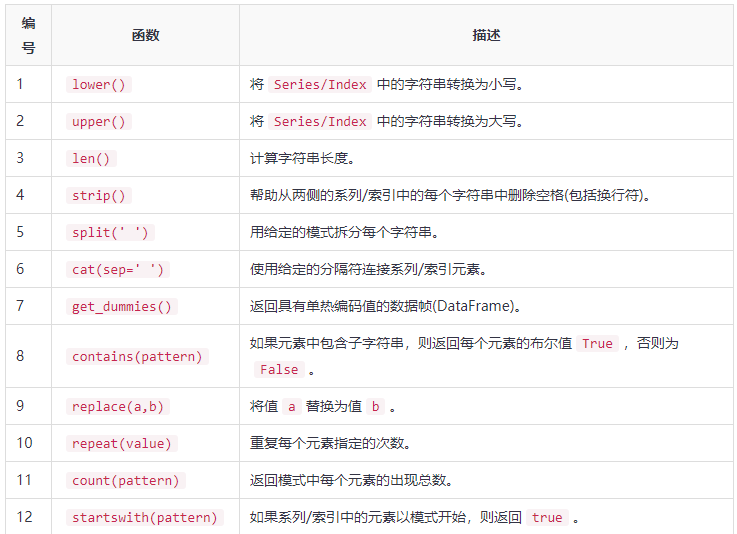

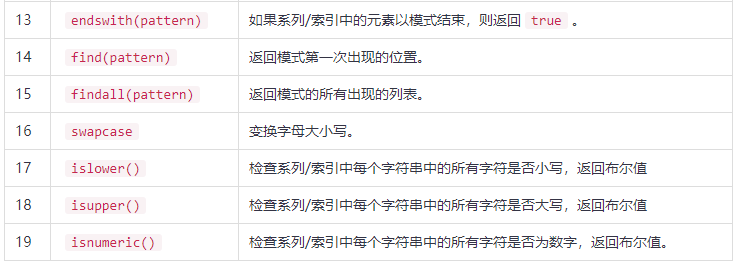

In [44]:
# 生成样例数据
s = pd.Series(['Tom','William Rick','John','Alber@t',np.nan,'1234','SteveMinsu'])
s

0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveMinsu
dtype: object

In [45]:
# lower()函数示例
s.str.lower()  # 字符串转换成小写

0             tom
1    william rick
2            john
3         alber@t
4             NaN
5            1234
6      steveminsu
dtype: object

In [46]:
# upper()函数示例
s.str.upper() # 字符串转换成大写

0             TOM
1    WILLIAM RICK
2            JOHN
3         ALBER@T
4             NaN
5            1234
6      STEVEMINSU
dtype: object

In [47]:
# len()函数示例
s.str.len() # 返回字符串的长度

0     3.0
1    12.0
2     4.0
3     7.0
4     NaN
5     4.0
6    10.0
dtype: float64

In [48]:
# strip()函数示例
s.str.strip()

0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveMinsu
dtype: object

In [49]:
s.str.strip(' ')

0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveMinsu
dtype: object

In [50]:
# cat(sep=pattern)函数示例
s.str.cat(sep='<=>')

'Tom<=>William Rick<=>John<=>Alber@t<=>1234<=>SteveMinsu'

In [51]:
# get_dummies()函数示例
s.str.get_dummies()

,1234,Alber@t,John,SteveMinsu,Tom,William Rick
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0
5,1,0,0,0,0,0
6,0,0,0,1,0,0


In [52]:
# contains()函数示例
s.str.contains(' ')

0    False
1     True
2    False
3    False
4      NaN
5    False
6    False
dtype: object

### 4. Pandas缺失数据
数据丢失(缺失)在现实生活中总是一个问题。 机器学习和数据挖掘等领域由于数据缺失导致的数据质量差，在模型预测的准确性上面临着严重的问题。 在这些领域，缺失值处理是使模型更加准确和有效的重点。

#### 4.1 查找缺失值
对于数值数据，pandas使用浮点值NaN（Not a Number）表示缺失数据。我们称其为哨兵值，可以方便的检测出来：

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({'A':[1,6,np.nan,4,np.nan],'B':[2,np.nan,3,9,5],'C':[5,7,9,8,4]})
data

,A,B,C
0,1.0,2.0,5
1,6.0,NaN,7
2,NaN,3.0,9
3,4.0,9.0,8
4,NaN,5.0,4


In [3]:
# 通过isnull()和notnull()函数检查缺失值
data.isnull()  # True表示NaN

,A,B,C
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False
4,True,False,False


In [4]:
data.notnull()  # False表示NaN

,A,B,C
0,True,True,True
1,True,False,True
2,False,True,True
3,True,True,True
4,False,True,True


In [5]:
# 统计每一列有多少个缺失值
data.isnull().sum()

A    2
B    1
C    0
dtype: int64

In [6]:
# 统计每一行有多少个缺失值
data.isnull().sum(axis=1)

0    0
1    1
2    1
3    0
4    1
dtype: int64

In [7]:
# 查找出具有缺失值的行index
data.index[data.isnull().sum(axis=1)>0]

Int64Index([1, 2, 4], dtype='int64')

#### 4.2 删除缺失值

In [10]:
# dropna()函数
# dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# axis: 默认为0，删除包含缺失值的行；当为1时，删除包含缺失值得列
# how: 默认为‘any’，只要有缺失值出现，就删除；‘all’，所有的值都缺失，才删除
# thresh: axis中至少有thresh个非缺失值，否则删除
# subset: 在哪些列中查看是否有缺失值
# inplace: 是否在原数据上操作。如果为真，返回None否则返回新的copy

data.dropna()  # 删除存空值的行,how默认为any

,A,B,C
0,1.0,2.0,5
3,4.0,9.0,8


In [11]:
data.dropna(axis=1) # 删除存在缺失值的列

,C
0,5
1,7
2,9
3,8
4,4


In [12]:
data.dropna(axis=1,how='all')  # 当列中的数据都为空时，才删除

,A,B,C
0,1.0,2.0,5
1,6.0,NaN,7
2,NaN,3.0,9
3,4.0,9.0,8
4,NaN,5.0,4


In [13]:
data.dropna(axis = 1,thresh = 4) # 每一列的非空值个数>=4，否则删除

,B,C
0,2.0,5
1,NaN,7
2,3.0,9
3,9.0,8
4,5.0,4


In [14]:
data.dropna(axis = 1,thresh = 4, inplace = True)  # 在原数据上操作
data

,B,C
0,2.0,5
1,NaN,7
2,3.0,9
3,9.0,8
4,5.0,4


#### 4.3 缺失值填补
你可能不想滤除缺失数据（有可能会丢弃跟它有关的其他数据），而是希望通过其他方式填补那些“空洞”。对于大多数情况而言，fillna方法是最主要的函数。通过一个常数调用fillna就会将缺失值替换为那个常数值

In [15]:
# fillna()函数可以通过几种方法用非空数据“填充”NA值
# fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
# value：用于填充缺失值的标量值或字典对象
# method：插值方式。如果函数调用时未指定其他参数的话，默认为‘ffill’
# axis：待填充的轴，默认为0
# inplace：修改调用者对象而不产生副本
# limit：（对于前向和后向填充）可以连续填充的最大数量

# 用标量数据填充缺失值
data = pd.DataFrame({'A':[1,6,np.nan,4,np.nan],'B':[2,np.nan,3,9,5],'C':[5,7,9,8,4]})
print(data)
print('==========================')
print(data.fillna(0))  # 使用0来填充缺少值

     A    B  C
0  1.0  2.0  5
1  6.0  NaN  7
2  NaN  3.0  9
3  4.0  9.0  8
4  NaN  5.0  4
     A    B  C
0  1.0  2.0  5
1  6.0  0.0  7
2  0.0  3.0  9
3  4.0  9.0  8
4  0.0  5.0  4


In [23]:
data.fillna(data.mean())  # 用均值来填补缺失值

,A,B,C
0,1.000000,2.00,5
1,6.000000,4.75,7
2,3.666667,3.00,9
3,4.000000,9.00,8
4,3.666667,5.00,4


In [22]:
# 若是通过一个字典调用fillna，就可以实现对不同的列填充不同的值
data.fillna(value = {'A':0.5,'B':0.4})  # 用0.5来填补A列的空值，0.4来填补B列的空值

,A,B,C
0,1.0,2.0,5
1,6.0,0.4,7
2,0.5,3.0,9
3,4.0,9.0,8
4,0.5,5.0,4


In [35]:
# 利用填充的概念，来填补缺失的值
# pad/fill   填充方法向前
# bfill/backfill      填充方法向后

data.fillna(method='pad')  # 将缺失值按照前面一个值进行填充。

,A,B,C
0,1.0,2.0,5
1,6.0,2.0,7
2,6.0,3.0,9
3,4.0,9.0,8
4,4.0,5.0,4


In [36]:
data.fillna(method='bfill') # 将缺失值按照后面一个值进行填充

,A,B,C
0,1.0,2.0,5
1,6.0,3.0,7
2,4.0,3.0,9
3,4.0,9.0,8
4,NaN,5.0,4


In [39]:
data.fillna(axis=1,method='bfill')  # 修改轴方向，用后面列的值来填充

,A,B,C
0,1.0,2.0,5.0
1,6.0,7.0,7.0
2,3.0,3.0,9.0
3,4.0,9.0,8.0
4,5.0,5.0,4.0


In [40]:
# limit 限制填充个数
df = pd.DataFrame({'A':[1,6,np.nan,np.nan,np.nan],'B':[2,np.nan,3,9,5],'C':[5,7,9,8,4]})
print(df)
print('==================')
print(df.fillna(method='pad',limit=1))  # 限制向前填充个数为1

     A    B  C
0  1.0  2.0  5
1  6.0  NaN  7
2  NaN  3.0  9
3  NaN  9.0  8
4  NaN  5.0  4
     A    B  C
0  1.0  2.0  5
1  6.0  2.0  7
2  6.0  3.0  9
3  NaN  9.0  8
4  NaN  5.0  4


#### 4.4 数据替换

In [56]:
# replace（self，to_replace = None，value = None，inplace = False，limit = None，regex = False，method ='pad' ）
# 将to_replace替换成value
# to_replace：被替换的值
# value：用于替换的值，可以是标量，字典，列表等
# inplace：如果为True，在原数据上操作；默认为False
# limit：向前或向后填充的最大间隔

df = pd.DataFrame({'one':[10,20,30,40,50],
                   'two':[1000,0,30,40,50]})
df.replace(0,100) # 将0替换成100

,one,two
0,10,1000
1,20,100
2,30,30
3,40,40
4,50,50


In [57]:
# 用字典形式来替换多个数值
# 字典的key为原值，value为替换后的值
df.replace({0:666,1000:888})  

,one,two
0,10,888
1,20,666
2,30,30
3,40,40
4,50,50


In [58]:
# 也可以用列表的形式替换多个数值
# 传入两个列表，第一个列表中的值为原值，第二列表中的值为替换值
df.replace([0,50],[666,5]) # 用666来替换0；5替换50

,one,two
0,10,1000
1,20,666
2,30,30
3,40,40
4,5,5


In [59]:
df.replace([0,50],['A','B'],inplace = True)  # 在原数据上修改
df

,one,two
0,10,1000
1,20,A
2,30,30
3,40,40
4,B,B


In [63]:
# 使用正则表达式来替换
# 注意，在使用正则表达式替换时，必须将regex设置为True
df.replace(r'[A-Z]','N',regex=True)  # 将所有大写英文替换成N

,one,two
0,10,1000
1,20,N
2,30,30
3,40,40
4,N,N


### 5. pandas2新功能

#### 5.1 Groupby的命名聚合
可以直接为指定的聚合输出列命名

In [4]:
# 创建样例数据
import pandas as pd
import numpy as np
animals = pd.DataFrame({'品种':['猫','狗','猫','狗'],
                       '身高':[9.1,6.0,9.5,34.0],
                       '体重':[7.9,7.5,9.9,198.0]})
animals

,品种,身高,体重
0,猫,9.1,7.9
1,狗,6.0,7.5
2,猫,9.5,9.9
3,狗,34.0,198.0


在Pandas2中，命名聚合支持中文变量名，不过在平时的代码书写中，建议还是使用英文变量名

In [5]:
animals.groupby('品种').agg(
    最低 = pd.NamedAgg(column='身高',aggfunc='min'),
    最高 = pd.NamedAgg(column='身高',aggfunc='max'),
    平均体重 = pd.NamedAgg(column='体重',aggfunc=np.mean)
)

,最低,最高,平均体重
品种,,,
狗,6.0,34.0,102.75
猫,9.1,9.5,8.90


上面的写法看起来还是有点繁琐，我们可以使用更简单的写法，只需传递一个Tuple就可以了，在Tuple的第一个元素是指定列，第二个元素是聚合函数，具体如下所示：

In [6]:
animals.groupby('品种').agg(
    最低 = ('身高',min),
    最高 = ('身高',max),
    平均体重 = ('体重',np.mean)
)

,最低,最高,平均体重
品种,,,
狗,6.0,34.0,102.75
猫,9.1,9.5,8.90


#### 5.2 Groupby聚合支持多个lambda函数
以 list 方式向 agg() 函数传递多个 lambda 函数

In [7]:
animals.groupby('品种').身高.agg([
       lambda x:x.iloc[0],lambda x: x.iloc[-1]
])

,<lambda_0>,<lambda_1>
品种,,
狗,6.0,34.0
猫,9.1,9.5


In [8]:
animals.groupby('品种').agg([
    lambda x: x.iloc[0] - x.iloc[1],
    lambda x: x.iloc[0] + x.iloc[1]
])

身高                    体重           
   <lambda_0> <lambda_1> <lambda_0> <lambda_1>
品种                                            
狗       -28.0       40.0     -190.5      205.5
猫        -0.4       18.6       -2.0       17.8

这个功能也有个小遗憾，多 lambda 函数的输出没有像命名聚合那样可以自定义命名，还要后面手动修改，有些不方便

#### 5.3 优化了MultiIndex显示输出

MultiIndex 输出的每行数据以 Tuple 显示，且垂直对齐，这样一来，MultiIndex 的结构显示的更清晰了。

In [12]:
pd.MultiIndex.from_product([['a','abc'],range(500)])

MultiIndex([(  'a',   0),
            (  'a',   1),
            (  'a',   2),
            (  'a',   3),
            (  'a',   4),
            (  'a',   5),
            (  'a',   6),
            (  'a',   7),
            (  'a',   8),
            (  'a',   9),
            ...
            ('abc', 490),
            ('abc', 491),
            ('abc', 492),
            ('abc', 493),
            ('abc', 494),
            ('abc', 495),
            ('abc', 496),
            ('abc', 497),
            ('abc', 498),
            ('abc', 499)],
           length=1000)

#### 5.4 精简显示Series与DataFrame
超过 60 行的 Series 与 DataFrame，pandas 会默认最多只显示 60 行（见 display.max_rows 选项）。这种设置依然会占用大量垂直屏幕空间。因此，0.25 版引入了 display.min_rows 选项，默认只显示 10 行：
- 数据量小的 Series 与 DataFrame， 显示 max_row 行数据，默认为 60 行，前 30 行与后 30 行；
- 数据量大的 Series 与 DataFrame，如果数据量超过 max_rows， 只显示 min_rows 行，默认为 10 行，即前 5 行与后 5 行。

Jupyter Notebook目前还不支持这个设置

#### 5.5 json_normalize()支持max_level
json_normalize() 支持按层级（level）读取，增加了 max_level 控制参数

In [19]:
from pandas.io.json import json_normalize

data = [{
        'CreatedBy': {'Name': 'User001'},
        'Lookup': {'TextField': 'Some text',  
                   'UserField': {'Id': 'ID001', 'Name': 'Name001'}},
        'Image': {'a': 'b'}
        }]
json_normalize(data,max_level=1)  # 控制读取的JSON数据层级为1

,CreatedBy.Name,Lookup.TextField,Lookup.UserField,Image.a
0,User001,Some text,"{'Id': 'ID001', 'Name': 'Name001'}",b


#### 5.6 增加explode()方法，把list“炸”成行
Series 与 DataFrame 增加了 explode() 方法，把 list 形式的值转换为单独的行

In [20]:
df = pd.DataFrame([{'变量1': 'a,b,c', '变量2': 1},
                   {'变量1': 'd,e,f', '变量2': 2}])
df

,变量1,变量2
0,"a,b,c",1
1,"d,e,f",2


In [21]:
df.assign(变量1=df.变量1.str.split(',')).explode('变量1')

,变量1,变量2
0,a,1
0,b,1
0,c,1
1,d,2
1,e,2
1,f,2


#### 5.7 SparseDataFrame已废弃
0.25 以前专门有 SparseDataFrame()，生成稀疏矩阵，0.25 以后，这个函数被废弃了，改成 pd.DataFrame 里的 pd.SparseArray() 

In [22]:
pd.DataFrame({"A":pd.SparseArray([0,1])})

,A
0,0
1,1


#### 5.8 Groupby.apply的修改
对 DataFrame Groupby 后，Groupby.apply 对每组只处理一次

In [23]:
df = pd.DataFrame({'a':['x','y'],'b':[1,2]})
def func(group):
    print(group.name)
    return group

df.groupby('a').apply(func)

x
y


,a,b
0,x,1
1,y,2


#### 5.9 Query()支持列名空格

In [30]:
data = [
    {'姓 名': '张三', '城 市': '北京', '年 龄': 18},
    {'姓 名': '李四', '城 市': '上海', '年 龄': 19, '爱 好': '打游戏'},
    {'姓 名': '王五', '城 市': '广州', '年 龄': 20, '财务状况': '优'}
]
data = pd.DataFrame(data)

上面的 data 示例 DataFrame的列名是有空格的，现在用反引号(\`)括住列名，就可以直接查询了

In [31]:
data.query('`年 龄` < 19')

,姓 名,城 市,年 龄,爱 好,财务状况
0,张三,北京,18,NaN,NaN
